### 목표
 - 한국 영화 리뷰 문장 데이터를 활용하여 긍정/부정 감성 분석 진행해보자
 - TF-idf vectorizer를 활용해보자
 - Konlpy 한국어 형태소 분석기를 설치하고 활용해보자
 - 단어별 긍정/부정 정보를 확인 해보자


In [1]:
# 파이썬 버전 확인
import sys
print('sys version')
print(sys.version)

sys version
3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]


In [2]:
from konlpy.tag import Kkma
kkma = Kkma() # 한글 형태소 분석기(꼬꼬마)

In [5]:
s = '아 더빙.. 진짜 짜증나네요 목소리' # 명사 추출
kkma.nouns(s)

['더빙', '목소리']

In [7]:
import pandas as pd
import numpy as np
# 판다스 옵션 설정
pd.set_option('display.max_colwidth',None) # 컬럼너비설정
pd.set_option('display.max_rows',None)# 행 최대 개수 설정

##### 데이터 불러오기
 - 네이버 영화 리뷰 데이터(한국어)

In [9]:
df_train = pd.read_csv('data/ratings_train.csv', encoding = 'utf-8') # 한국어로 번역
df_train.head(30)
#label = 0 부정 / = 1 긍정

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [11]:
# test 불러오기
df_test = pd.read_csv('data/ratings_test.csv', encoding = 'utf-8')
df_test.head(10)

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
5,7898805,"음악이 주가 된, 최고의 음악영화",1
6,6315043,진정한 쓰레기,0
7,6097171,"마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다",0
8,8932678,갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한cg남무 아 그립다 동사서독같은 영화가 이건 3류아류작이다,0
9,6242223,"이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네..",1


In [16]:
#train 크기
print('훈련 데이터 크기: ' ,df_train.shape)
#test 크기
print('테스트 데이터 크기 : ' , df_test.shape)

훈련 데이터 크기:  (150000, 3)
테스트 데이터 크기 :  (50000, 3)


In [17]:
# 정보 확인 : .info()
df_train.info()
df_test.info()
# 5개 정도 결측치가 있다는 것 확인 - df_train -> 결측치를 없애야함, 전처리 필요
# 3개 정도 결측치가 있다는 것 확인 - df_test -> 결측치를 없애야함, 전처리 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


#### 데이터 전처리
 - 결측치 존재하는 행 삭제

In [19]:
# train 결측치 존재하는 행 모두 삭제
df_train.dropna(inplace = True) # dropna = 결측치 존재하는 행 삭제
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [20]:
# test 결측치 존재하는 행 모두 삭제
df_test.dropna(inplace = True) # dropna = 결측치 존재하는 행 삭제
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49997 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49997 non-null  int64 
 1   document  49997 non-null  object
 2   label     49997 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


 - X,y 분할 

In [24]:
df_train.columns

Index(['id', 'document', 'label'], dtype='object')

In [27]:
# 훈련용 문제, 답
text_train = df_train['document']# 리뷰 내용 = 문제
# df_train.loc[:,'document']
# df_train.iloc[:,1] <- 이것도 맞음

y_train = df_train['label']# 긍정/부정 = 답

# 테스트용 문제, 답
text_test = df_test['document']# 리뷰 내용 = 문제
# df_test.loc[:,'document']
# df_test.iloc[:,1] <- 이것도 맞음
y_test = df_test['label']# 긍정/부정 = 답

#크기 확인
print('훈련용 문제 크기 : ', text_train.shape)
print('훈련용 답 크기 : ', y_train.shape)
print('테스트용 문제 크기 : ', text_test.shape)
print('테스트용 답 크기 : ', y_test.shape)


훈련용 문제 크기 :  (149995,)
훈련용 답 크기 :  (149995,)
테스트용 문제 크기 :  (49997,)
테스트용 답 크기 :  (49997,)


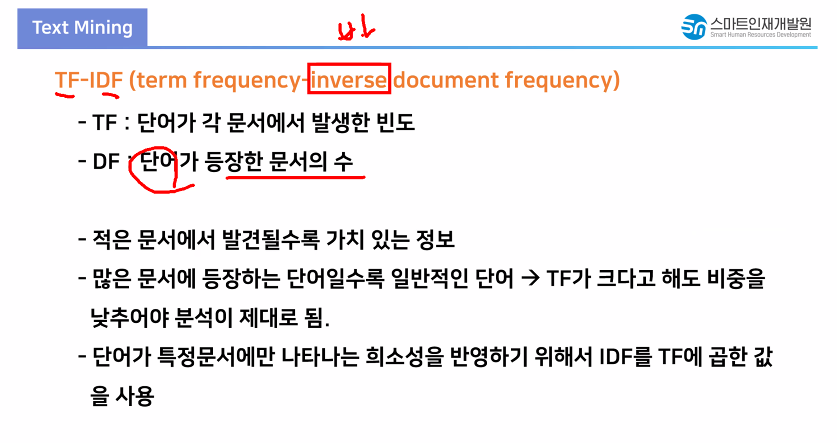

#### vectorizer
 - 벡터라이저는 말그대로 어떤 대상을 벡터로 바꾸는 작업 수행
 - 기계학습 분야에서는 주로 텍스트를 쉽게 분석하기 위해서 벡터로 표현할 때 사용
 - 숫자나 벡터를 input으로 기대하는 머신러닝 모델을 실행하기 위해서는 텍스트나 또 다른 형태의 데이터를 숫자나 벡터로 나타낼 필요가 있고, 그것을 해주는 도구가 vectorizer

#### BOW (Bag of Word)
문서를 벡터로 변환하는 가장 쉽고 기본적인 방법
 - 문서(리뷰 문장) 내의 모든 단어를 모아 사전(가방)을 만듬
 - 특정 문서(리뷰문장) 어떤 단어가 들어있는 지 리스트 형태로 순서- 숫자로 나태는 것

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
text_train[:3]

0                  아 더빙.. 진짜 짜증나네요 목소리
1    흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                    너무재밓었다그래서보는것을추천한다
Name: document, dtype: object

In [33]:
# 예시 생성
tf_idf_vect = TfidfVectorizer()

# 단어 사전 구축 -> fit
tf_idf_vect.fit(text_train[:3])
# 단어 사전 확인
tf_idf_vect.vocabulary_ # 단어별로 토큰식으로 보여짐

# 특정 문서를 변환 -> transform
tf_idf_vect.transform(text_train[:3]).toarray()
# 결과 : 1행 = 문장을 뜻함 // 0, 0, 0.5 = 단어

array([[0.       , 0.       , 0.5      , 0.5      , 0.       , 0.       ,
        0.5      , 0.5      , 0.       , 0.       ],
       [0.4472136, 0.       , 0.       , 0.       , 0.4472136, 0.4472136,
        0.       , 0.       , 0.4472136, 0.4472136],
       [0.       , 1.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       ]])

 - tf_idf는 기본적으로 어절 단위 ( 문장을 이루는 도막도막 ) 로 끊기 때문에 한국어 특성상 의미 파악이 어려움
 - 더 작은 단위인 형태소 별로 나눠서 의미를 파악하게 해줘야함 -> konlpy 

#### 한국어 형태소 분석기
knolpy - kkma 사용하기 : kkma(꼬꼬마)
 - nouns() : 명사 추출 하는 함수
 - morphs() : 형태소 추출 함수
 - pos() : 품사 부착하여 형태소 추출 함수

In [34]:
from konlpy.tag import Kkma

In [ ]:
# 객체 생성
kkma = Kkma()

In [37]:
# 명사 추출
kkma.nouns('아 오늘 본 영화 완전 노잼!')

['오늘', '영화', '완전', '노', '노잼', '잼']

tf-idf 벡터라이저와 konlpy랑 연결하여 세밀하게 분리한 후 벡터화

In [38]:
# 1. 명사 추출 토크나이저 함수 정의 -> apply 화
def myTokenizer(text) : 
    return kkma.nouns(text)

In [40]:
# konlpy 연결 객체 생성
tmp_tfidf_vect = TfidfVectorizer(tokenizer = myTokenizer) 

# 단어 사전(모음, 가방) 구축
# fit
tmp_tfidf_vect.fit(text_train[:3]) # 3개 리뷰문장으로 단어사전 구축

# 단어 사전 확인
# vocaburaly_
tmp_tfidf_vect.vocabulary_

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'더빙': 0,
 '목소리': 2,
 '흠': 17,
 '포스터': 15,
 '포스터보고': 16,
 '보고': 4,
 '초': 12,
 '초딩영화줄': 13,
 '딩': 1,
 '영화': 6,
 '줄': 11,
 '오버': 7,
 '오버연기': 8,
 '연기': 5,
 '재': 9,
 '재밓': 10,
 '밓': 3,
 '추천': 14}

#### pos tagging 활용
 - 형태소 추출하여 품사 태깅해주는 기능을 통해 명사, 형용사, 동사 찾아보자

In [41]:
# 품사 태그 종류 출력
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [44]:
# 단순 형태소만 추출
kkma.morphs(text_train[0])

['아', '아', '더빙', '..', '진짜', '짜증나', '네요', '목소리']

In [45]:
text_train[0]

'아 더빙.. 진짜 짜증나네요 목소리'

In [43]:
# 품사 태깅 형태소 추출
kkma.pos(text_train[0])

[('아', 'VV'),
 ('아', 'ECS'),
 ('더빙', 'NNG'),
 ('..', 'SW'),
 ('진짜', 'MAG'),
 ('짜증나', 'VV'),
 ('네요', 'EFN'),
 ('목소리', 'NNG')]

In [46]:
# 품사 태깅 형태소 추출
data = '먹는다 먹다 먹었다 예쁘다 예쁜얼굴 아름답다 사진 모자 사람'
kkma.pos(data)

[('먹', 'VV'),
 ('는', 'EPT'),
 ('다', 'ECS'),
 ('먹', 'VV'),
 ('다', 'ECS'),
 ('먹', 'VV'),
 ('었', 'EPT'),
 ('다', 'ECS'),
 ('예쁘', 'VA'),
 ('다', 'ECS'),
 ('예쁘', 'VA'),
 ('ㄴ', 'ETD'),
 ('얼굴', 'NNG'),
 ('아름답', 'VA'),
 ('다', 'ECS'),
 ('사진', 'NNG'),
 ('모자', 'NNG'),
 ('사람', 'NNG')]

In [58]:
# df 형태로 변환 
df = pd.DataFrame(kkma.pos(data), columns=['morphs','tag']) #
df.set_index('tag',inplace=True)
df

# 감성분석 - 형용사, 동사, 보통명사 추출
df.loc[['VV','VA','NNG']]

# 코드 변형 - pandas 버전이 업데이트 되면서 인덱싱하는 코드의 내부 구조가 변형
# tf-idf 연결할 때에는 intersection 함수를 통해 인덱싱 진행
df.loc[df.index.intersection(['VV','VA','NNG']),'morphs'].values

array(['먹', '먹', '먹', '예쁘', '예쁘', '아름답', '얼굴', '사진', '모자', '사람'],
      dtype=object)

In [64]:
# 명사, 동사, 형용사 접근하는 함수
def myTokenizer2(text):
    df = pd.DataFrame(kkma.pos(text), columns=['morphs','tag']) #
    df.set_index('tag',inplace=True) # 데이터프레임의 인덱스를 tag 로 둠
    # 명사, 동사, 형용사 있을 때 조건 코드
    if ('VV' in df.index) | ('VA' in df.index) | ('NNG' in df.index):
        return df.loc[df.index.intersection(['VV','VA','NNG']),'morphs'].values # [행 , 열] 
    
    # 없을 때 빈리스트 반환
    else:
        return []

In [65]:
# tf-idf 객체 생성
# 임시 사용
# 3개의 문장 text_train[:3]
tmp_tfidf_vect2 = TfidfVectorizer(tokenizer = myTokenizer2)
# 단어사전 구축
tmp_tfidf_vect2.fit(text_train[:3])
# 단어사전 확인
tmp_tfidf_vect2.vocabulary_

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'아': 5,
 '짜증나': 12,
 '더빙': 1,
 '목소리': 2,
 '흠': 15,
 '포스터': 14,
 '보고': 4,
 '영화': 8,
 '줄': 11,
 '오버': 9,
 '연기': 7,
 '가볍': 0,
 '재': 10,
 '추천': 13,
 '어': 6,
 '보': 3}

 - tfidf 벡터라이저 최종 생성 후 실제 데이터 반영

In [66]:
final_tfidf_vect = TfidfVectorizer(tokenizer=myTokenizer2)
final_tfidf_vect.fit(text_train[:10000])

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(tokenizer=<function myTokenizer2 at 0x000001B704070E50>)

In [69]:
# 구축한 단어 사전 확인
print('단어사전의 단어개수 : ', len(final_tfidf_vect.vocabulary_))
print('단어 확인 : ',final_tfidf_vect.vocabulary_.keys())
# 컬럼 개수 , 특성 개수 , 문제 기준 개수

단어사전의 단어개수 :  8748
단어 확인 :  dict_keys(['아', '짜증나', '더빙', '목소리', '흠', '포스터', '보고', '영화', '줄', '오버', '연기', '가볍', '재', '추천', '어', '보', '교도소', '이야기', '재미', '점', '조정', '멀', '없', '익살', '스파이', '더', '맨', '커스틴', '돋보이', '늙', '보이', '하', '이쁘', '걸음마', '초등학교', '학년', '생인', '용', '별', '반개', '떼', '아깝', '원작', '긴장감', '살리', '욕', '이응', '경', '길', '우', '생활', '발', '납', '감금', '반복', '이', '드라마', '가족', '사람', '모', '엿', '나오', '낫', '액션', '안', '있', '평점', '우드', '식', '화려', '낮', '헐', '길들이', '인피', '니트', '짱', '나', '죽', '때', '눈물', '향수', '자극', '허', '진호', '감성', '절제', '멜로', '달인', '울', '손들', '건너', '뛰쳐나오', '횡단보도', '범수', '드럽', '좋', '신문', '기사', '잊어버리', '취향', '존중', '진짜', '내생', '극장', '노', '잼', '감동', '임', '스토리', '어거지', 'ㄱ', '긴장', '참', '바스코', '바', '비', '아이', '돌이', '안달', '웃기', '이기', '까', '낳', '굿바이', '레', '표절', '이해', '뒤', '니', '재미없', '깨알', '캐스팅', '내용', '구성', '일드', '약탈자', '변명', '절대', '위하', '드', '착하', '나름', '심', '오한', '뜻', '학생', '선생', '놀아나', '아니', '웃', '건', '불가능', '같', '음식', '베', '만찬', '차이', '남', '핀란드', '풍경', '구경', '늘', '수작', '말씀드리', '주제'